In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import random
import os
from scipy.stats import norm

In [13]:
M = np.zeros((6,4))
M[0] = np.arange(4)
print(M[0])
print(M[0].reshape(4,1))
C = np.array([[0],
              [1],
              [2],
              [3]])
D = np.transpose(C)
D.shape

[0. 1. 2. 3.]
[[0.]
 [1.]
 [2.]
 [3.]]


(1, 4)

In [53]:
#load beta values from csv file 
#construct A, B matrices
#initialize M = 75x4 zeroes matrix 
#for row in M: 
    #M[row] = lagged variables 
    #Compute Y
    #M[row+1] = Y
    
numbers = ['01','02','03','04','05','06','07','08','09','10','11','12','13']
path = 'GIMME analyses/Cleaned GIMME Data/Control_group_output/individual/'

for batch in range(1,11): #10 sets of simulated data
    for num in numbers:
        data = np.loadtxt(path+'10'+num+'Betas.csv', skiprows=1, usecols=range(1,9), delimiter=',')
        A = data[:,4:] #same day beta values, (4x4)
        B = data[:,:4] #lagged beta values
        
        if num == '08':
            print(A)
            print(B)
            
        M = np.zeros((75,4)) 
        VR, SS, ANX, INT = np.genfromtxt('GIMME analyses/Cleaned GIMME Data/Control_Group/10' #emperical data
                                         +num+'.txt', skip_header=1, unpack=True)

        std_vr, mean_vr = np.nanstd(VR), np.nanmean(VR)  
        std_ss, mean_ss = np.nanstd(SS), np.nanmean(SS)
        std_anx, mean_anx = np.nanstd(ANX), np.nanmean(ANX)
        std_int, mean_int = np.nanstd(INT), np.nanmean(INT) 
        
        #day 1 data from emperical data
        vr,ss,anx,intt = VR[0],SS[0],ANX[0],INT[0]
        if num == '10': 
            vr = VR[3]
        M[0] = np.array([mean_vr, mean_ss, mean_anx, mean_int])   
         
        t = np.arange(0,74) #[0,...,73]
        for day in t: 

            C = np.array([[std_vr**2*np.random.randn()],
                          [std_ss**2*np.random.randn()],
                          [std_anx**2*np.random.randn()],
                          [std_int**2*np.random.randn()]]) 

            Y_lagged = np.reshape(M[day], (4,1)) #same day vr,ss,anx,int
            Y = np.dot((np.transpose(np.dot(B, Y_lagged)+C)),(np.linalg.inv(np.identity(4)-A))) #next day vr,ss,anx,int
            Y = Y + np.array([mean_vr, mean_ss, mean_anx, mean_int])
            M[day+1] = Y

#         if num == '01':
#             plt.plot(M[:,0])

        #clipping VR (0-5)
        indices = np.where(M[:,0]<0)[0]
        M[indices,0] = 0
        indices = np.where(M[:,0]>5)[0]
        M[indices,0] = 5
        
        #clipping other variables (1-5)
        indices = np.where(M[:,1:4]<1)[0]
        M[indices,1:4] = 1
        indices = np.where(M[:,1:4]>5)[0]
        M[indices,1:4] = 5
        
#         if num == '01':
#             plt.plot(M[:,0])
            
        np.savetxt('set '+str(batch)+' individual 10'+num, M, delimiter=',', header='VR,SS,ANX,INT', comments='')

#         plt.figure(figsize=(8,6))
#         plt.plot(times[1:], M[1:,0], label='VR', linestyle='-', color='purple')
#         plt.plot(times[1:], M[1:,1], label='SS',linestyle='-', color='teal')
#         plt.plot(times[1:], M[1:,2], label='ANX',linestyle='--', color='orange')
#         plt.plot(times[1:], M[1:,3], label='INT',linestyle='--', color='gray')
#         plt.legend()
#         plt.xlabel('Times [day]')
#         plt.ylabel('Marker')
#         plt.title('Individual '+num)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[ 0.2652  0.      0.      0.    ]
 [ 0.      0.6058 -0.2244  0.    ]
 [ 0.      0.      0.3283  0.    ]
 [ 0.      0.      0.      0.    ]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[ 0.2652  0.      0.      0.    ]
 [ 0.      0.6058 -0.2244  0.    ]
 [ 0.      0.      0.3283  0.    ]
 [ 0.      0.      0.      0.    ]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[ 0.2652  0.      0.      0.    ]
 [ 0.      0.6058 -0.2244  0.    ]
 [ 0.      0.      0.3283  0.    ]
 [ 0.      0.      0.      0.    ]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[ 0.2652  0.      0.      0.    ]
 [ 0.      0.6058 -0.2244  0.    ]
 [ 0.      0.      0.3283  0.    ]
 [ 0.      0.      0.      0.    ]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[ 0.2652  0.      0.      0.    ]
 [ 0.      0.6058 -0.2244  0.    ]
 [ 0.      0.      0.3283  0.    ]
 [ 0.      0.      0.     

Text(0.5, 1.0, 'set 1 individual 1002')

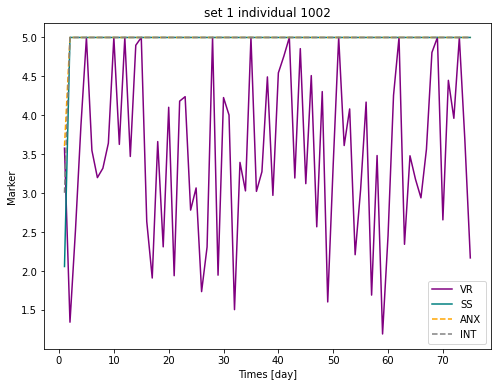

In [36]:
#Test one individual 

fname='set 1 individual 1002'
vr,ss,anx,intt=np.loadtxt(fname, unpack=True, skiprows=1, delimiter=',')
t = np.arange(1,76) #[1,...,75]

plt.figure(figsize=(8,6))
plt.plot(t, vr, label='VR', linestyle='-', color='purple')
plt.plot(t, ss, label='SS',linestyle='-', color='teal')
plt.plot(t, anx, label='ANX',linestyle='--', color='orange')
plt.plot(t, intt, label='INT',linestyle='--', color='gray')
plt.legend()
plt.xlabel('Times [day]')
plt.ylabel('Marker')
plt.title(fname)

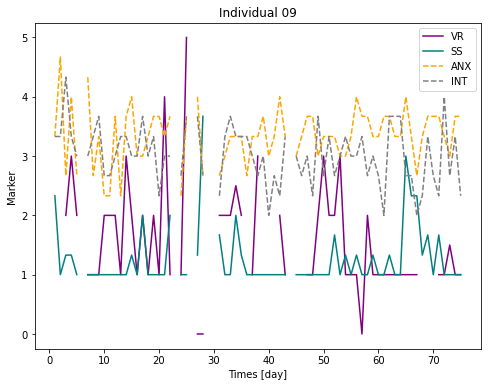

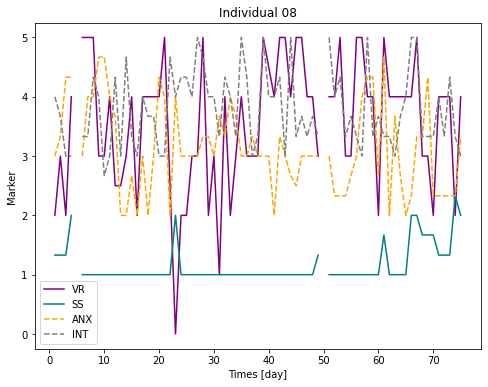

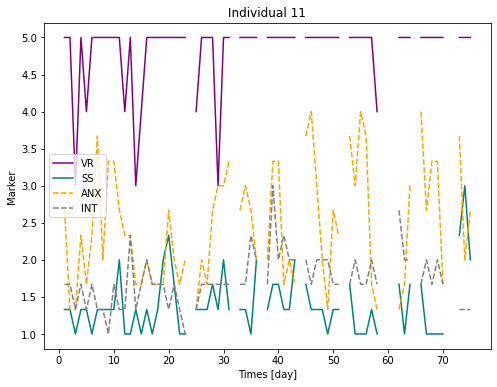

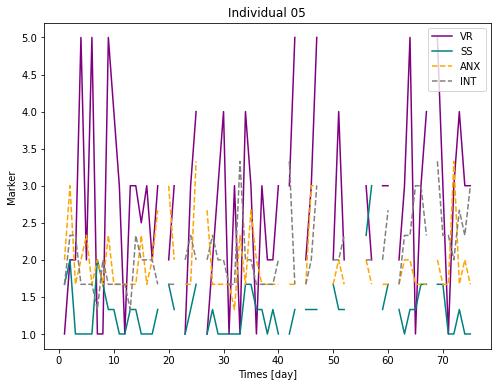

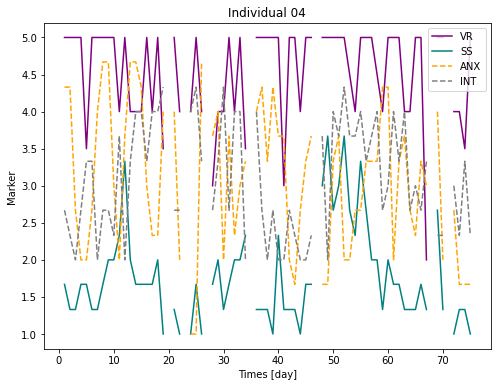

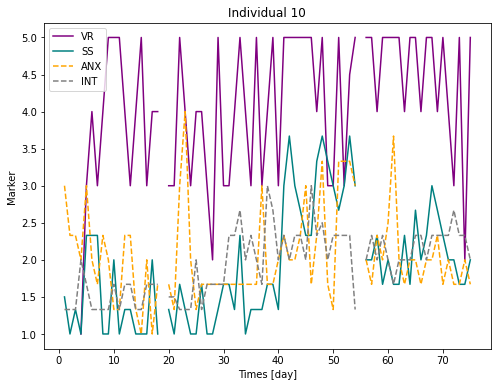

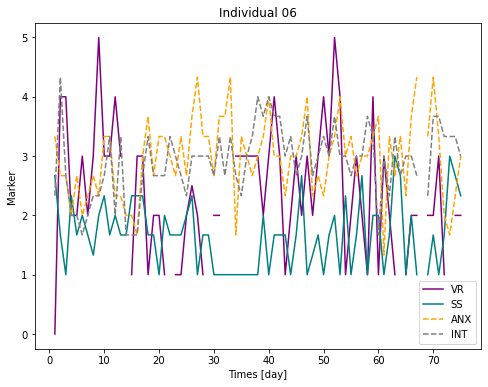

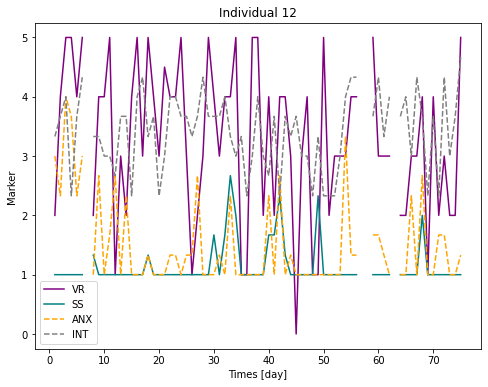

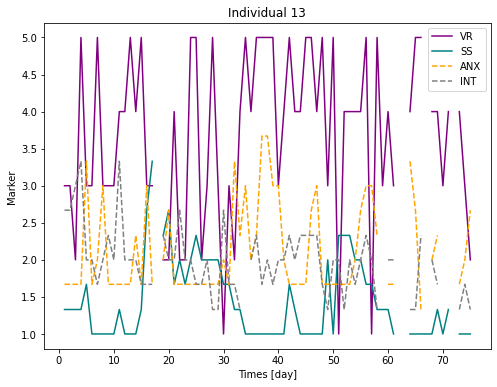

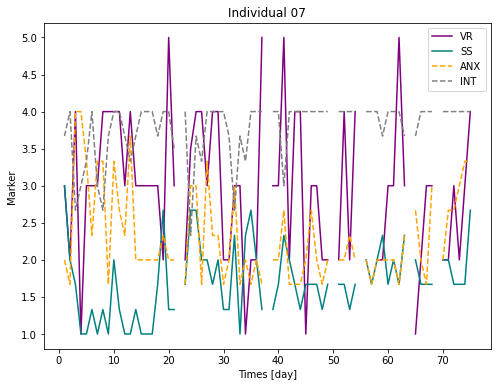

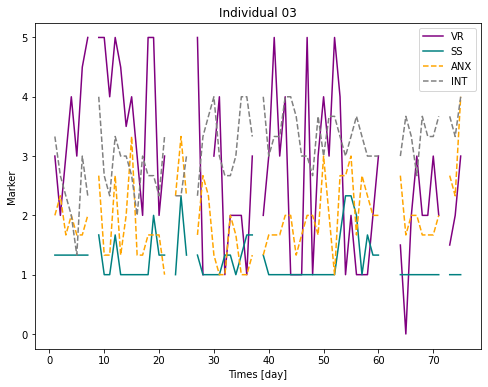

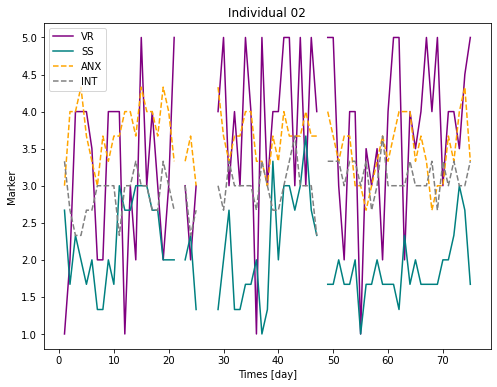

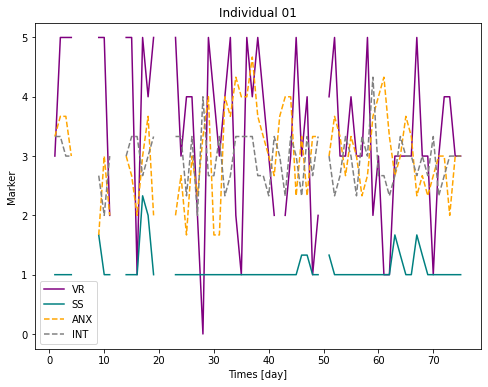

In [13]:
#Plot empirical data 

path = 'GIMME analyses/Cleaned GIMME Data/Control_Group'
for file in os.listdir(path): 
    VR, SS, ANX, INT = np.genfromtxt(path+'/'+file, skip_header=1, unpack=True)
    plt.figure(figsize=(8,6))
    plt.plot(t, VR, label='VR', linestyle='-', color='purple')
    plt.plot(t, SS, label='SS', linestyle='-', color='teal')
    plt.plot(t, ANX, label='ANX', linestyle='--', color='orange')
    plt.plot(t, INT, label='INT', linestyle='--', color='gray')
    plt.legend()
    plt.xlabel('Times [day]')
    plt.ylabel('Marker')
    plt.title('Individual '+file[2:4])

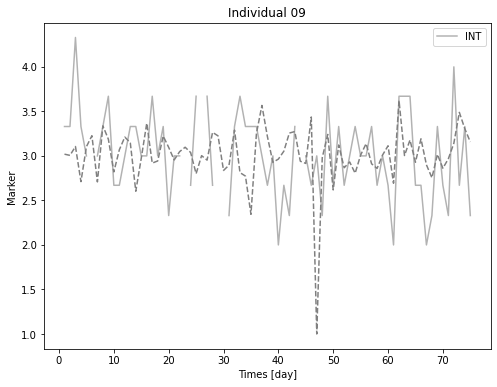

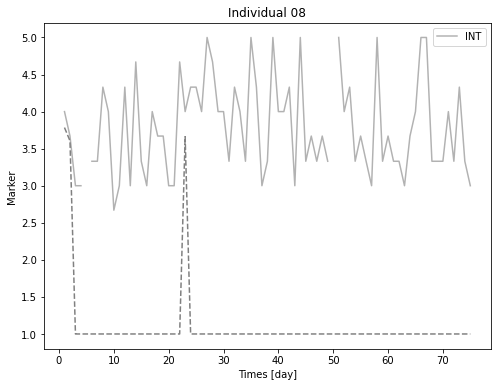

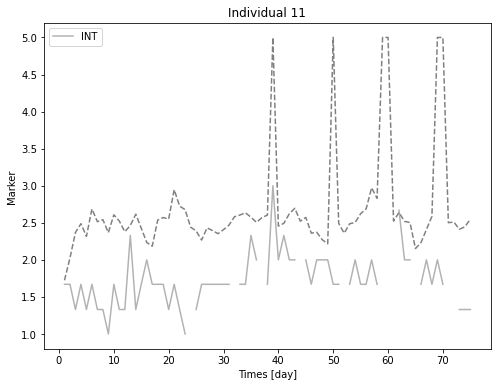

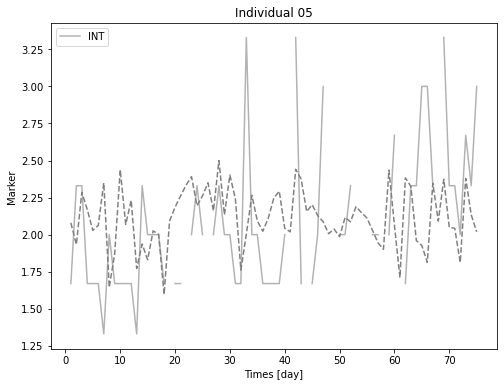

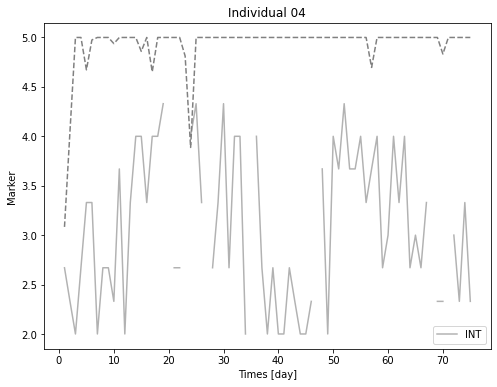

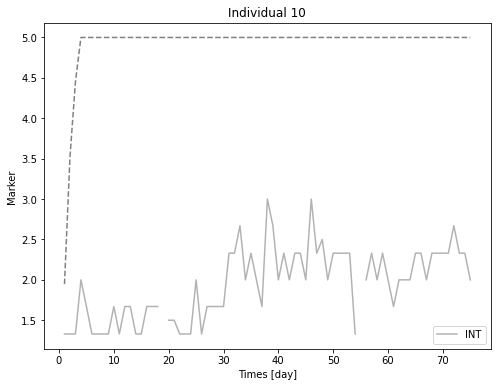

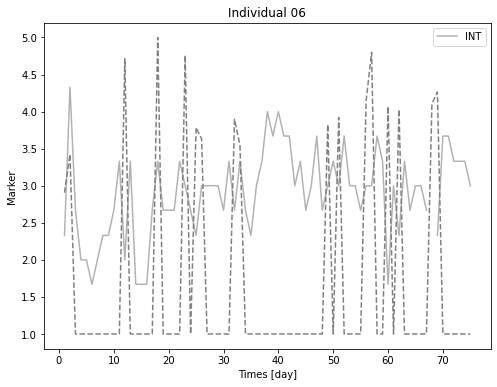

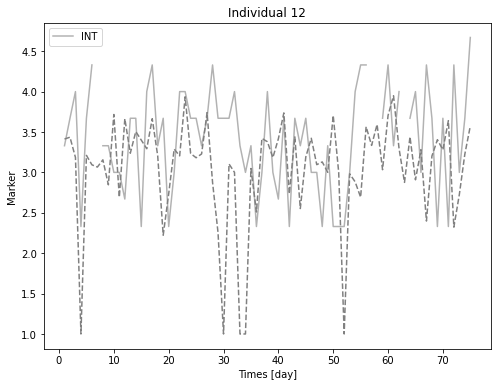

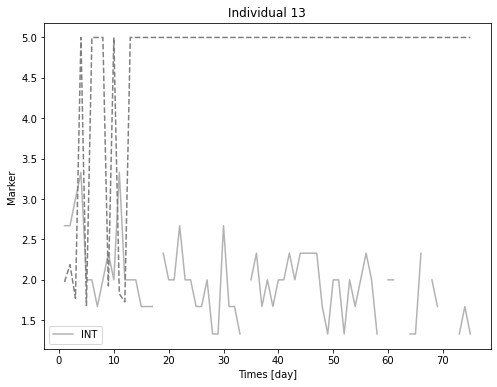

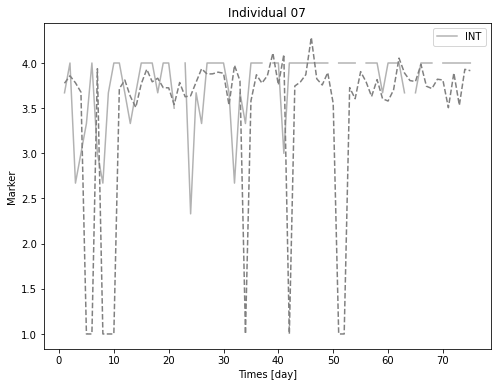

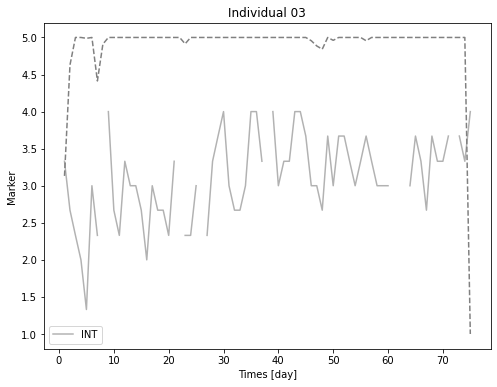

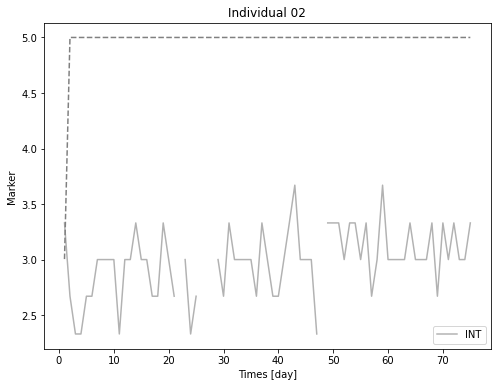

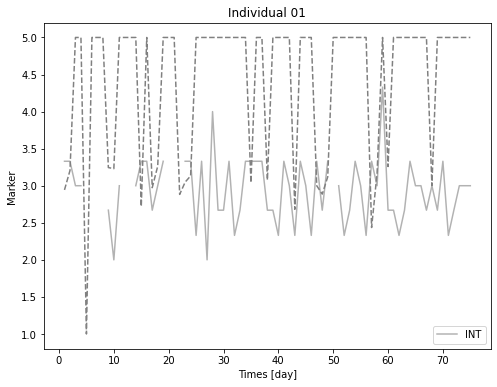

In [52]:
#Plot simulated and emperical data together. simulated is dotted, emperical is solid 

batch = np.arange(1,11)
path = 'GIMME analyses/Cleaned GIMME Data/Control_Group'
t = np.arange(1,76)

for ind in os.listdir(path): 
    VR, SS, ANX, INT = np.genfromtxt(path+'/'+ind, skip_header=1, unpack=True)
    fname = 'set '+str(batch[0])+' individual 10'+ind[2:4] #choose one of ten sets 
    vr,ss,anx,intt = np.loadtxt(fname, unpack=True, skiprows=1, delimiter=',')

    plt.figure(figsize=(8,6))
    
#     plt.plot(t, VR, label='VR', alpha=0.6, linestyle='-', color='purple')
#     plt.plot(t, vr, linestyle='--', color='purple')
    
#     plt.plot(t, SS, label='SS', alpha=0.6, linestyle='-', color='teal')
#     plt.plot(t, ss, linestyle='--', color='teal')
    
#     plt.plot(t, ANX, label='ANX', alpha=0.6, linestyle='-', color='orange')
#     plt.plot(t, anx, linestyle='--', color='orange')
    
    plt.plot(t, INT, label='INT', alpha=0.6, linestyle='-', color='gray')
    plt.plot(t, intt, linestyle='--', color='gray')
    
    #print(np.nanstd(VR), np.std(vr))
    
    plt.legend()
    plt.xlabel('Times [day]')
    plt.ylabel('Marker')
    plt.title('Individual '+ind[2:4]) 

In [ ]:
#Get noise level from empirical data across all individuals 

path = 'GIMME analyses/Cleaned GIMME Data/Control_Group'
VR_tot, SS_tot, ANX_tot, INT_tot = np.array([]), np.array([]), np.array([]), np.array([])

for file in os.listdir(path): 
    VR, SS, ANX, INT = np.genfromtxt(path+'/'+file, skip_header=1, unpack=True)
    VR_tot = np.append(VR_tot, VR)
    SS_tot = np.append(SS_tot, SS)
    ANX_tot = np.append(ANX_tot, ANX)
    INT_tot = np.append(INT_tot, INT)

std_vr, mean_vr = np.nanstd(VR_tot), np.nanmean(VR_tot)
std_ss, mean_ss = np.nanstd(SS_tot), np.nanmean(SS_tot)
std_anx, mean_anx = np.nanstd(ANX_tot), np.nanmean(ANX_tot)
std_int, mean_int = np.nanstd(INT_tot), np.nanmean(INT_tot)
print(std_vr)

#Histogram for VR 

plt.hist(VR_tot, alpha=0.6, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_vr, std_vr)
plt.plot(x, p, 'k', linewidth=2)